# 2.1 - Evaluación Supervisado

### Regresión

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.ensemble import RandomForestRegressor as RFR    # el modelo , el alias es cosa mia

from sklearn.model_selection import train_test_split as tts  # el alias es cosa mia

from sklearn.datasets import load_diabetes   # dataset

In [2]:
data = load_diabetes()

data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
data['DESCR'].split('\n')

['.. _diabetes_dataset:',
 '',
 'Diabetes dataset',
 '----------------',
 '',
 'Ten baseline variables, age, sex, body mass index, average blood',
 'pressure, and six blood serum measurements were obtained for each of n =',
 '442 diabetes patients, as well as the response of interest, a',
 'quantitative measure of disease progression one year after baseline.',
 '',
 '**Data Set Characteristics:**',
 '',
 '  :Number of Instances: 442',
 '',
 '  :Number of Attributes: First 10 columns are numeric predictive values',
 '',
 '  :Target: Column 11 is a quantitative measure of disease progression one year after baseline',
 '',
 '  :Attribute Information:',
 '      - age     age in years',
 '      - sex',
 '      - bmi     body mass index',
 '      - bp      average blood pressure',
 '      - s1      tc, total serum cholesterol',
 '      - s2      ldl, low-density lipoproteins',
 '      - s3      hdl, high-density lipoproteins',
 '      - s4      tch, total cholesterol / HDL',
 '      - s5    

In [5]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

df['target'] = data['target']

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
X_train, X_test, y_train, y_test = tts(data['data'], data['target'])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 10), (111, 10), (331,), (111,))

In [9]:
# modelo

rfr = RFR()   # inicia el modelo

rfr.fit(X_train, y_train)   # entrena el modelo

y_pred = rfr.predict(X_test)   # prediccion

In [10]:
y_pred[:10]

array([163.84,  90.79, 221.51, 146.41, 121.68, 151.14,  91.05, 146.02,
       176.29, 180.58])

In [11]:
y_pred.shape

(111,)

In [12]:
y_test.shape

(111,)

###### MSE


$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}$$


pertenece al intervalo [0, +$\infty$)

In [13]:
from sklearn.metrics import mean_squared_error as mse    # alias mio

mse(y_test, y_pred)   # unidades al cuadrado

2934.012475675676

In [17]:
y_test.mean(), y_test.std()

(158.74774774774775, 76.69307831019124)

###### RMSE


$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [15]:
mse(y_test, y_pred, squared=False)  # mismas unidades que y_test

54.16652541630925

In [16]:
mse(y_test, y_pred) ** 0.5

54.16652541630925

###### RMSLE


$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(y_i)-log(\hat{y}_i))^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [19]:
from sklearn.metrics import mean_squared_log_error as msle

msle(y_test, y_pred, squared=False)

0.3664008515838175

###### MAE


$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$$


pertenece al intervalo [0, +$\infty$)

In [20]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

40.177477477477474

$$MAE <= RMSE <= MAE · \sqrt{N}$$

###### R2


$$R2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}{\sum_{i=1}^{n}(y_i-\bar{y})^{2}}$$

###### Adjusted R2

$$AdjustedR2 = 1-(1-R2)\frac{n-1}{n-p-1}$$


donde:
+ n = tamaño de la muestra
+ p = nº de variables del modelo


pertenecen al intervalo (-$\infty$, 1]

In [23]:
rfr.score(X_test, y_test)  # R2, calcula internamente la prediccion, viene del modelo

0.5011733859550115

In [24]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.5011733859550115

In [25]:
def r2_ajustado(r_2):
    
    adj = 1 - (1-r_2) * (X_test.shape[0]-1) / (X_test.shape[0]-X_test.shape[1]-1)
    
    return adj

In [26]:
r2_ajustado(r2(y_test, y_pred))

0.45129072455051267

### Clasificación

In [31]:
data = pd.read_csv('data/churn.csv')

data = data.dropna()

y = data.Churn.apply(lambda x: 1 if x=='Yes' else 0)

data = data.drop(columns=['customerID', 'Churn', 'ChurnBinary'])

data = pd.get_dummies(data)

X = data.copy()

X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthLevel_High,MonthLevel_Low,MonthLevel_Moderate,MonthLevel_Very High,MonthLevel_Very Low,TotalLevel_High,TotalLevel_Low,TotalLevel_Moderate,TotalLevel_Very High,TotalLevel_Very Low,TenureLevel_Loyal,TenureLevel_New,TenureLevel_Regular,TenureLevel_Very Loyal
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [32]:
X_train, X_test, y_train, y_test = tts(X, y, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5274, 59), (1758, 59), (5274,), (1758,))

In [34]:
# modelo 1

from sklearn.linear_model import LogisticRegression as LogReg


logreg = LogReg()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)   # devuelve la clase, la etiqueta 0-1

y_prob = logreg.predict_proba(X_test)    # devuelve probabilidades

y_pred_logreg[:3]

array([1, 0, 1])

In [35]:
y_prob[:3]

array([[0.28944986, 0.71055014],
       [0.69608629, 0.30391371],
       [0.28415088, 0.71584912]])

In [37]:
# modelo 2

from sklearn.ensemble import RandomForestClassifier as RFC

rfc = RFC()

rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)   # devuelve la clase, la etiqueta 0-1

y_pred_rfc[:3]

array([1, 0, 1])

In [39]:
rfc.predict_proba(X_test)[:3]

array([[0.44, 0.56],
       [0.91, 0.09],
       [0.43, 0.57]])

+ TP := True Positive (aciertos clase 1)
+ TN := True Negative (aciertos clase 0)
+ FP := False Positive (Error tipo I, decir 1 cuando es 0)
+ FN := False Negative (Error tipo II, decir 0 cuando es 1)

+ Accuracy  := (TP+TN)/(TP+TN+FP+FN) (acierto)  ($\frac{1}{n}\sum 1(\hat{y_i}=y_i$))
+ Precision := TP/(TP+FP)
+ Recall    := TP/(TP+FN)  (Sensibilidad, TPR)
+ F1_Score  := 2·Recall·Precision/(Recall+Precision)

(F1 funciona mejor que el accuracy cuando los datos no están balanceados y cuando FP y FN son muy diferentes)

![f1](images/f1.png)

##### Accuracy

In [40]:
logreg.score(X_test, y_test)

0.823094425483504

In [41]:
rfc.score(X_test, y_test)

0.7952218430034129

In [42]:
from sklearn.metrics import accuracy_score as acc

In [43]:
acc(y_test, y_pred_logreg)

0.823094425483504

In [44]:
acc(y_test, y_pred_rfc)

0.7952218430034129

##### Precision

In [45]:
from sklearn.metrics import precision_score as prec  # lo que YO digo que es que sí

prec(y_test, y_pred_logreg)

0.7010309278350515

In [46]:
prec(y_test, y_pred_rfc)

0.6507042253521127

##### Recall

In [47]:
from sklearn.metrics import recall_score as rec # lo que de verdad es que sí

rec(y_test, y_pred_logreg)

0.582441113490364

In [48]:
rec(y_test, y_pred_rfc)

0.49464668094218417

##### F1_Score

In [50]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred_logreg)

0.6362573099415204

In [51]:
f1(y_test, y_pred_rfc)

0.5620437956204379

In [54]:
y_test.value_counts() / y_test.shape[0] * 100

0    73.435722
1    26.564278
Name: Churn, dtype: float64

##### Matriz de Confusión

![conf_matrix](images/conf_matrix.jpeg)

In [55]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred_logreg)

array([[1175,  116],
       [ 195,  272]])

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

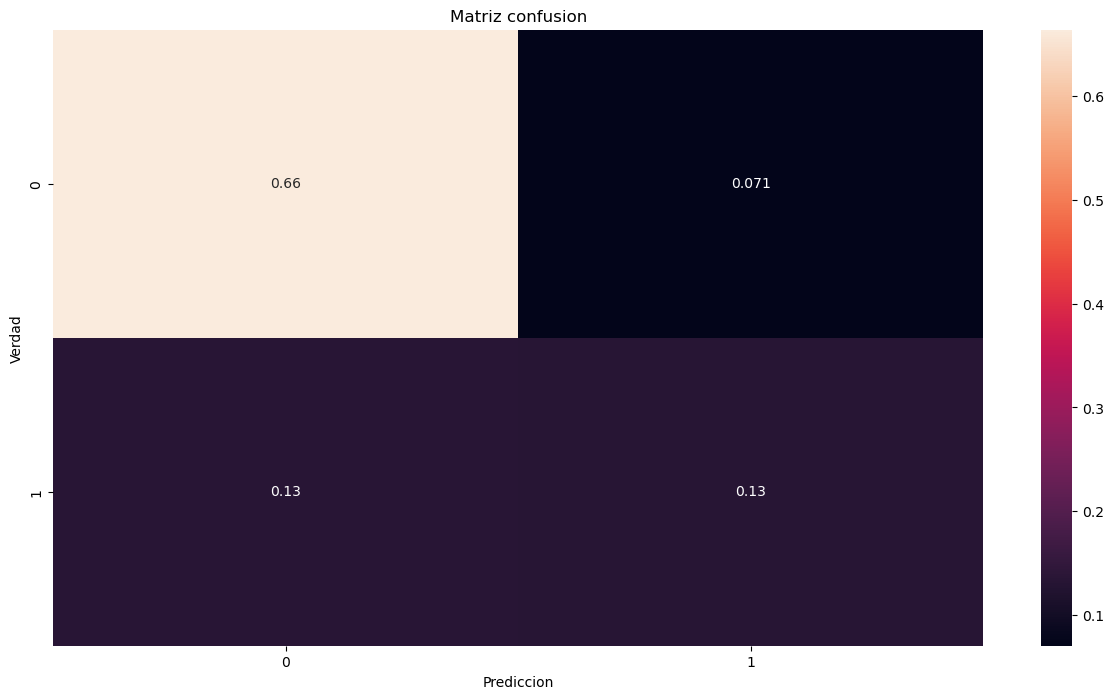

In [57]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred_rfc)/cm(y_test, y_pred_rfc).sum(), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

##### ROC-AUC  (Característica operativa del receptor y área debajo de la curva)

+ TPR := TP/(TP+FN)
+ FPR := FP/(TN+FP)


![roc](images/roc.png)

In [58]:
from sklearn.metrics import roc_curve as roc

from sklearn.metrics import roc_auc_score as auc

In [59]:
import warnings
warnings.filterwarnings('ignore')

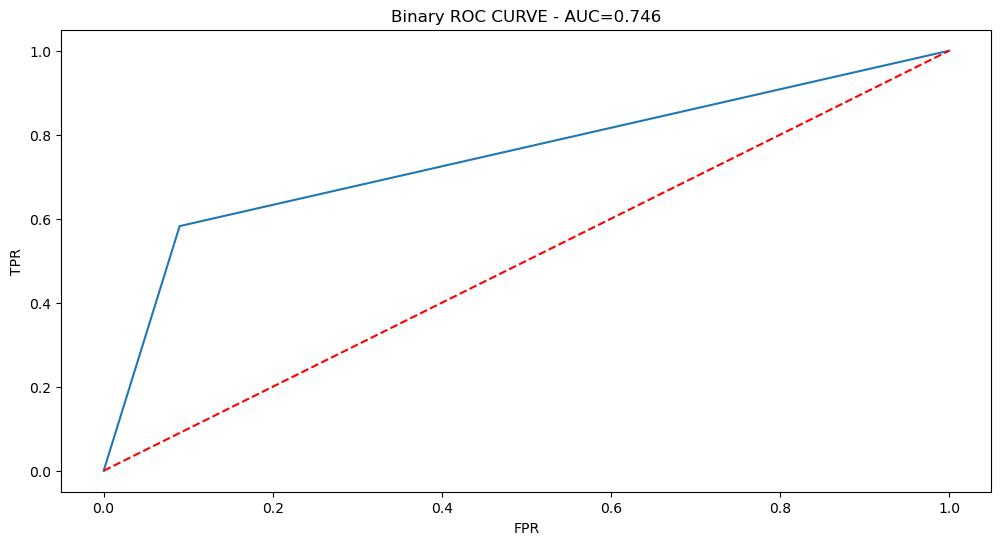

In [60]:
plt.figure(figsize=(12, 6))

fpr, tpr, _ = roc(y_test, y_pred_logreg)   # esto esta mal pintao

a = auc(y_test, y_pred_logreg)   # esta mal calculao

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, 'r--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.title('Binary ROC CURVE - AUC={:.3f}'.format(a))

plt.show()

In [64]:
y_prob = y_prob[::, 1]   # el segundo elemento de cada array, prob de clase 1

y_prob[:3]

array([0.71055014, 0.30391371, 0.71584912])

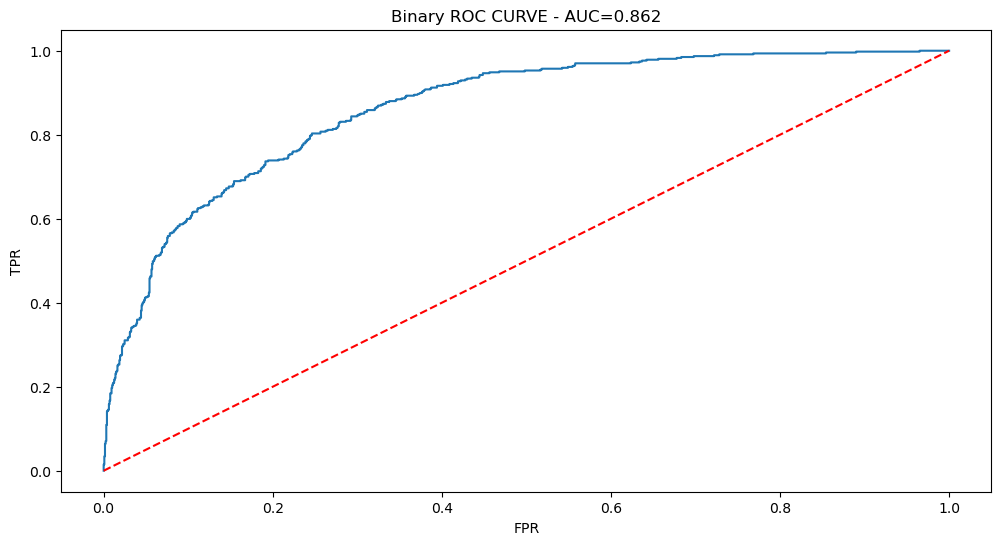

In [65]:
plt.figure(figsize=(12, 6))

fpr, tpr, _ = roc(y_test, y_prob)   # esto esta BIEN pintao, con probabilidad

a = auc(y_test, y_prob)   # esta BIEN calculao

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, 'r--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.title('Binary ROC CURVE - AUC={:.3f}'.format(a))

plt.show()

**Probabilidad de que tu clasificador sea mejor que un clasificador random - Kappa de Cohen**

https://es.wikipedia.org/wiki/Coeficiente_kappa_de_Cohen

In [66]:
from sklearn.metrics import cohen_kappa_score as kappa

In [67]:
kappa(y_test, y_pred_logreg)

0.5206987300757957

In [68]:
# multiclase

In [69]:
from sklearn.datasets import load_wine

X=load_wine().data

y=load_wine().target

X_train, X_test, y_train, y_test = tts(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [71]:
load_wine()['DESCR'].split('\n')

['.. _wine_dataset:',
 '',
 'Wine recognition dataset',
 '------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 178',
 '    :Number of Attributes: 13 numeric, predictive attributes and the class',
 '    :Attribute Information:',
 ' \t\t- Alcohol',
 ' \t\t- Malic acid',
 ' \t\t- Ash',
 '\t\t- Alcalinity of ash  ',
 ' \t\t- Magnesium',
 '\t\t- Total phenols',
 ' \t\t- Flavanoids',
 ' \t\t- Nonflavanoid phenols',
 ' \t\t- Proanthocyanins',
 '\t\t- Color intensity',
 ' \t\t- Hue',
 ' \t\t- OD280/OD315 of diluted wines',
 ' \t\t- Proline',
 '',
 '    - class:',
 '            - class_0',
 '            - class_1',
 '            - class_2',
 '\t\t',
 '    :Summary Statistics:',
 '    ',
 '    ============================= ==== ===== ======= =====',
 '                                   Min   Max   Mean     SD',
 '    ============================= ==== ===== ======= =====',
 '    Alcohol:                      11.0  14.8    13.0   0.8',
 '    Malic Aci

In [72]:
rfc=RFC()

rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

y_prob_rfc=rfc.predict_proba(X_test)

In [73]:
from sklearn.svm import SVC

svc=SVC(probability=True)

svc.fit(X_train, y_train)

y_prob=svc.predict_proba(X_test)

In [ ]:
%pip install scikit-plot

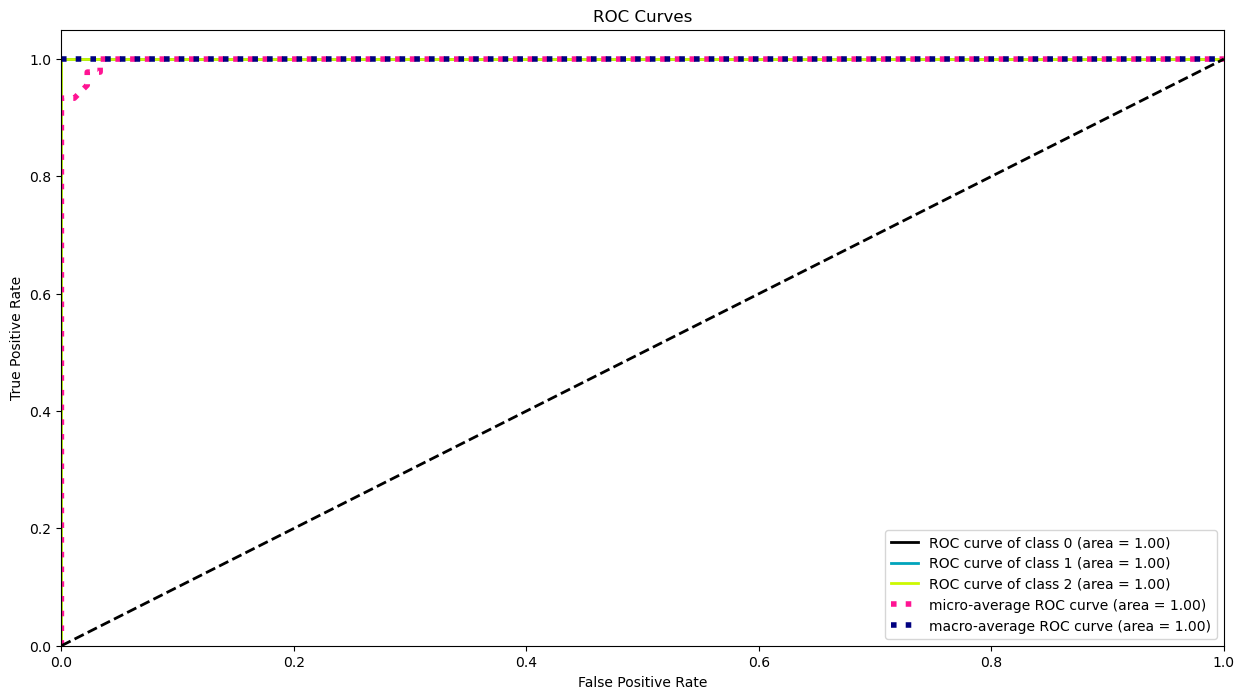

In [74]:
import scikitplot as skplt


skplt.metrics.plot_roc(y_test, y_prob_rfc, figsize=(15, 8));

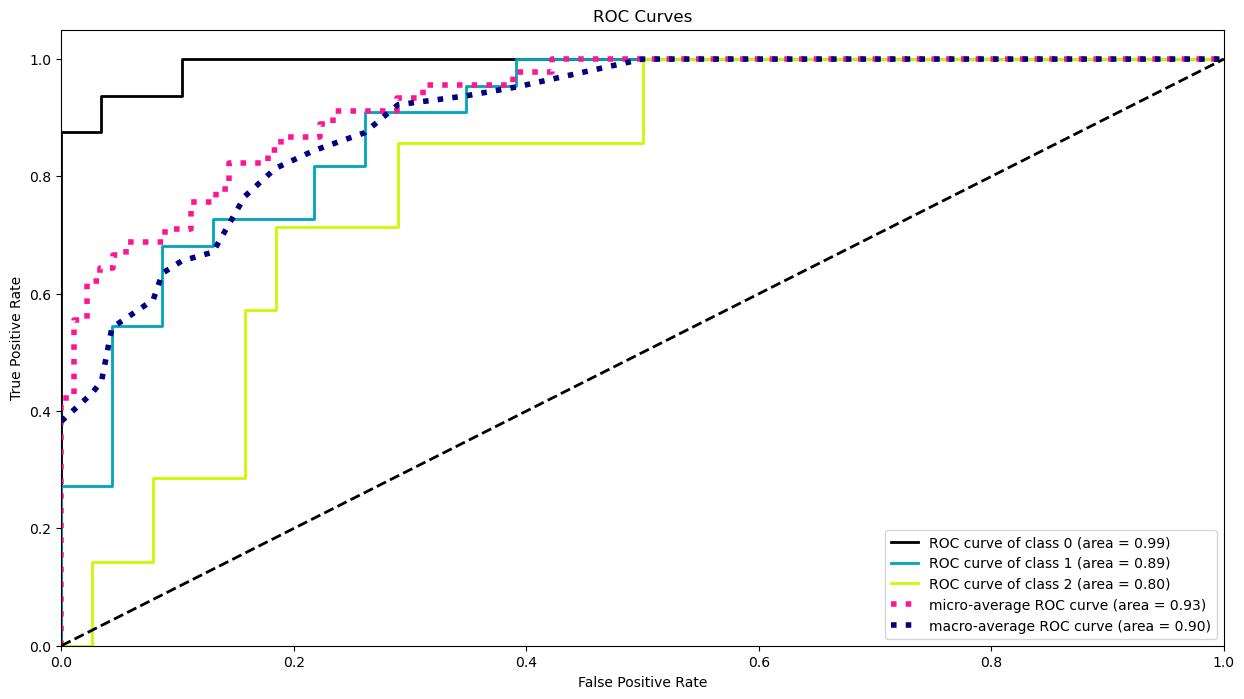

In [75]:
skplt.metrics.plot_roc(y_test, y_prob, figsize=(15, 8));